## Import necessary libraries

In [1]:
import sys
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


### Reading in data

In [2]:
#reading in the project adult data 
file_path = 'project_adult.csv'

try:
    df = pd.read_csv(file_path, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'project_adult.csv'. First 5 rows:
        0    1                 2       3          4              5   \
0      NaN  age         workclass  fnlwgt  education  education-num   
1   5514.0   33         Local-gov  198183  Bachelors             13   
2  19777.0   36           Private   86459  Assoc-voc             11   
3  10781.0   58  Self-emp-not-inc  203039        9th              5   
4  32240.0   21           Private  180190  Assoc-voc             11   

                   6                7              8      9       10  \
0      marital-status       occupation   relationship   race     sex   
1       Never-married   Prof-specialty  Not-in-family  White  Female   
2  Married-civ-spouse  Exec-managerial        Husband  White    Male   
3           Separated     Craft-repair  Not-in-family  White    Male   
4  Married-civ-spouse  Farming-fishing        Husband  White    Male   

             11            12              13              14      15  
0  capital-ga

In [3]:
# read in the project validation data
file_path = 'project_validation_inputs.csv'
try:
    validation = pd.read_csv(file_path, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(validation.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'project_validation_inputs.csv'. First 5 rows:
        0    1          2       3             4              5   \
0      NaN  age  workclass  fnlwgt     education  education-num   
1  14160.0   27    Private  160178  Some-college             10   
2  27048.0   45  State-gov   50567       HS-grad              9   
3  28868.0   29    Private  185908     Bachelors             13   
4   5667.0   30    Private  190040     Bachelors             13   

                   6                  7              8      9       10  \
0      marital-status         occupation   relationship   race     sex   
1            Divorced       Adm-clerical  Not-in-family  White  Female   
2  Married-civ-spouse    Exec-managerial           Wife  White  Female   
3  Married-civ-spouse    Exec-managerial        Husband  Black    Male   
4       Never-married  Machine-op-inspct  Not-in-family  White  Female   

             11            12              13              14  
0  capital-gain  capi

## Part 1: Preprocess the data

In [4]:
# process and standardize data
def preprocess_data(df, is_train = True):

    print(df.head())

    # For training data 
    if is_train:
        # correct column names
        new_column_names = ['id','age', 'work_class', 'fnlwgt', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country','income']
        df.columns = new_column_names

        # Handle missing values
        df =df.dropna()

        #remove fnlwgt and id column
        df = df.drop(columns=['fnlwgt'], axis=1)
        df = df.drop(columns=['id'], axis=1)

        # Binarize the target variable
        df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

        # Standardize cateforical features
        categorical_cols = ['work_class', 'education', 'marital_status', 'occupation',
                        'relationship', 'race', 'sex', 'native_country']
        le = LabelEncoder()
        for col in categorical_cols:
            df[col] = le.fit_transform(df[col])

        # Standardize numerical features
        numeric_cols = ['age','education_num','capital_gain','capital_loss','hours_per_week']
        scaler = StandardScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

        # Separate features and target
        X = df.drop(columns=['income'], axis=1)
        y = df[['income']]
        return X, y
    
    # For validation data
    else:
        # correct column names
        new_column_names = ['id','age', 'work_class', 'fnlwgt', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']
        df.columns = new_column_names

        # Handle missing values 
        df = df.dropna()

        # Standardize cateforical features
        categorical_cols = ['work_class', 'education', 'marital_status', 'occupation',
                        'relationship', 'race', 'sex', 'native_country']
        le = LabelEncoder()
        for col in categorical_cols:
            df[col] = le.fit_transform(df[col])
        
        #Standardize numerical features
        numeric_cols = ['age','education_num','capital_gain','capital_loss','hours_per_week']
        scaler = StandardScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

        return df

In [5]:
df1= preprocess_data(df, True)

        0    1                 2       3          4              5   \
0      NaN  age         workclass  fnlwgt  education  education-num   
1   5514.0   33         Local-gov  198183  Bachelors             13   
2  19777.0   36           Private   86459  Assoc-voc             11   
3  10781.0   58  Self-emp-not-inc  203039        9th              5   
4  32240.0   21           Private  180190  Assoc-voc             11   

                   6                7              8      9       10  \
0      marital-status       occupation   relationship   race     sex   
1       Never-married   Prof-specialty  Not-in-family  White  Female   
2  Married-civ-spouse  Exec-managerial        Husband  White    Male   
3           Separated     Craft-repair  Not-in-family  White    Male   
4  Married-civ-spouse  Farming-fishing        Husband  White    Male   

             11            12              13              14      15  
0  capital-gain  capital-loss  hours-per-week  native-country  incom

In [6]:
X,y = preprocess_data(df, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        id  age        work_class  fnlwgt  education  education_num  \
0      NaN  age         workclass  fnlwgt  education  education-num   
1   5514.0   33         Local-gov  198183  Bachelors             13   
2  19777.0   36           Private   86459  Assoc-voc             11   
3  10781.0   58  Self-emp-not-inc  203039        9th              5   
4  32240.0   21           Private  180190  Assoc-voc             11   

       marital_status       occupation   relationship   race     sex  \
0      marital-status       occupation   relationship   race     sex   
1       Never-married   Prof-specialty  Not-in-family  White  Female   
2  Married-civ-spouse  Exec-managerial        Husband  White    Male   
3           Separated     Craft-repair  Not-in-family  White    Male   
4  Married-civ-spouse  Farming-fishing        Husband  White    Male   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0  capital-gain  capital-loss  hours-per-week  native-country  incom

In [7]:
print(X.dtypes)  # Data types of the features

age               float64
work_class          int64
education           int64
education_num     float64
marital_status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country      int64
dtype: object


## Part 2: Implement Perceptron and Adaline algorithms

### Perceptron algorithm

In [8]:
class Perceptron:
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # if you use libarry versions stated by book use float_, else if new use float64
        # self.b_ = np.float_(0.)
        self.b_ = np.float64(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [9]:
X = pd.get_dummies(X, drop_first=True)  # one-hot encode categoricals
X = X.astype(float).values              # convert to numeric numpy array

# Encode target variable if needed
y = np.where(y == '>50K', 1, 0)

In [10]:
# Training the perceptron model
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X, y)

/var/folders/d1/pkkj1yg97vd_wwkpsfbyc2480000gn/T/ipykernel_8000/3010071995.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


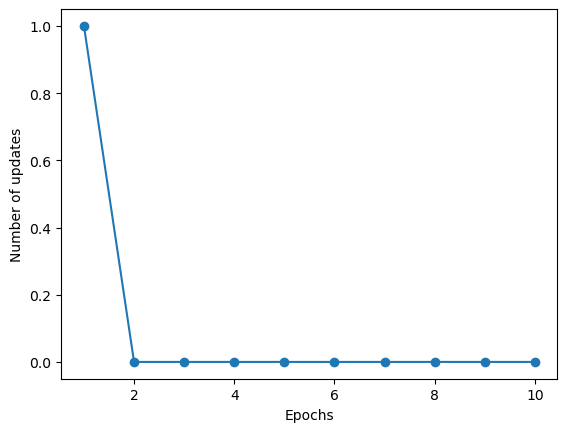

In [11]:
# Plot miscalssificaiotn error for each epoch
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

/var/folders/d1/pkkj1yg97vd_wwkpsfbyc2480000gn/T/ipykernel_8000/3010071995.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


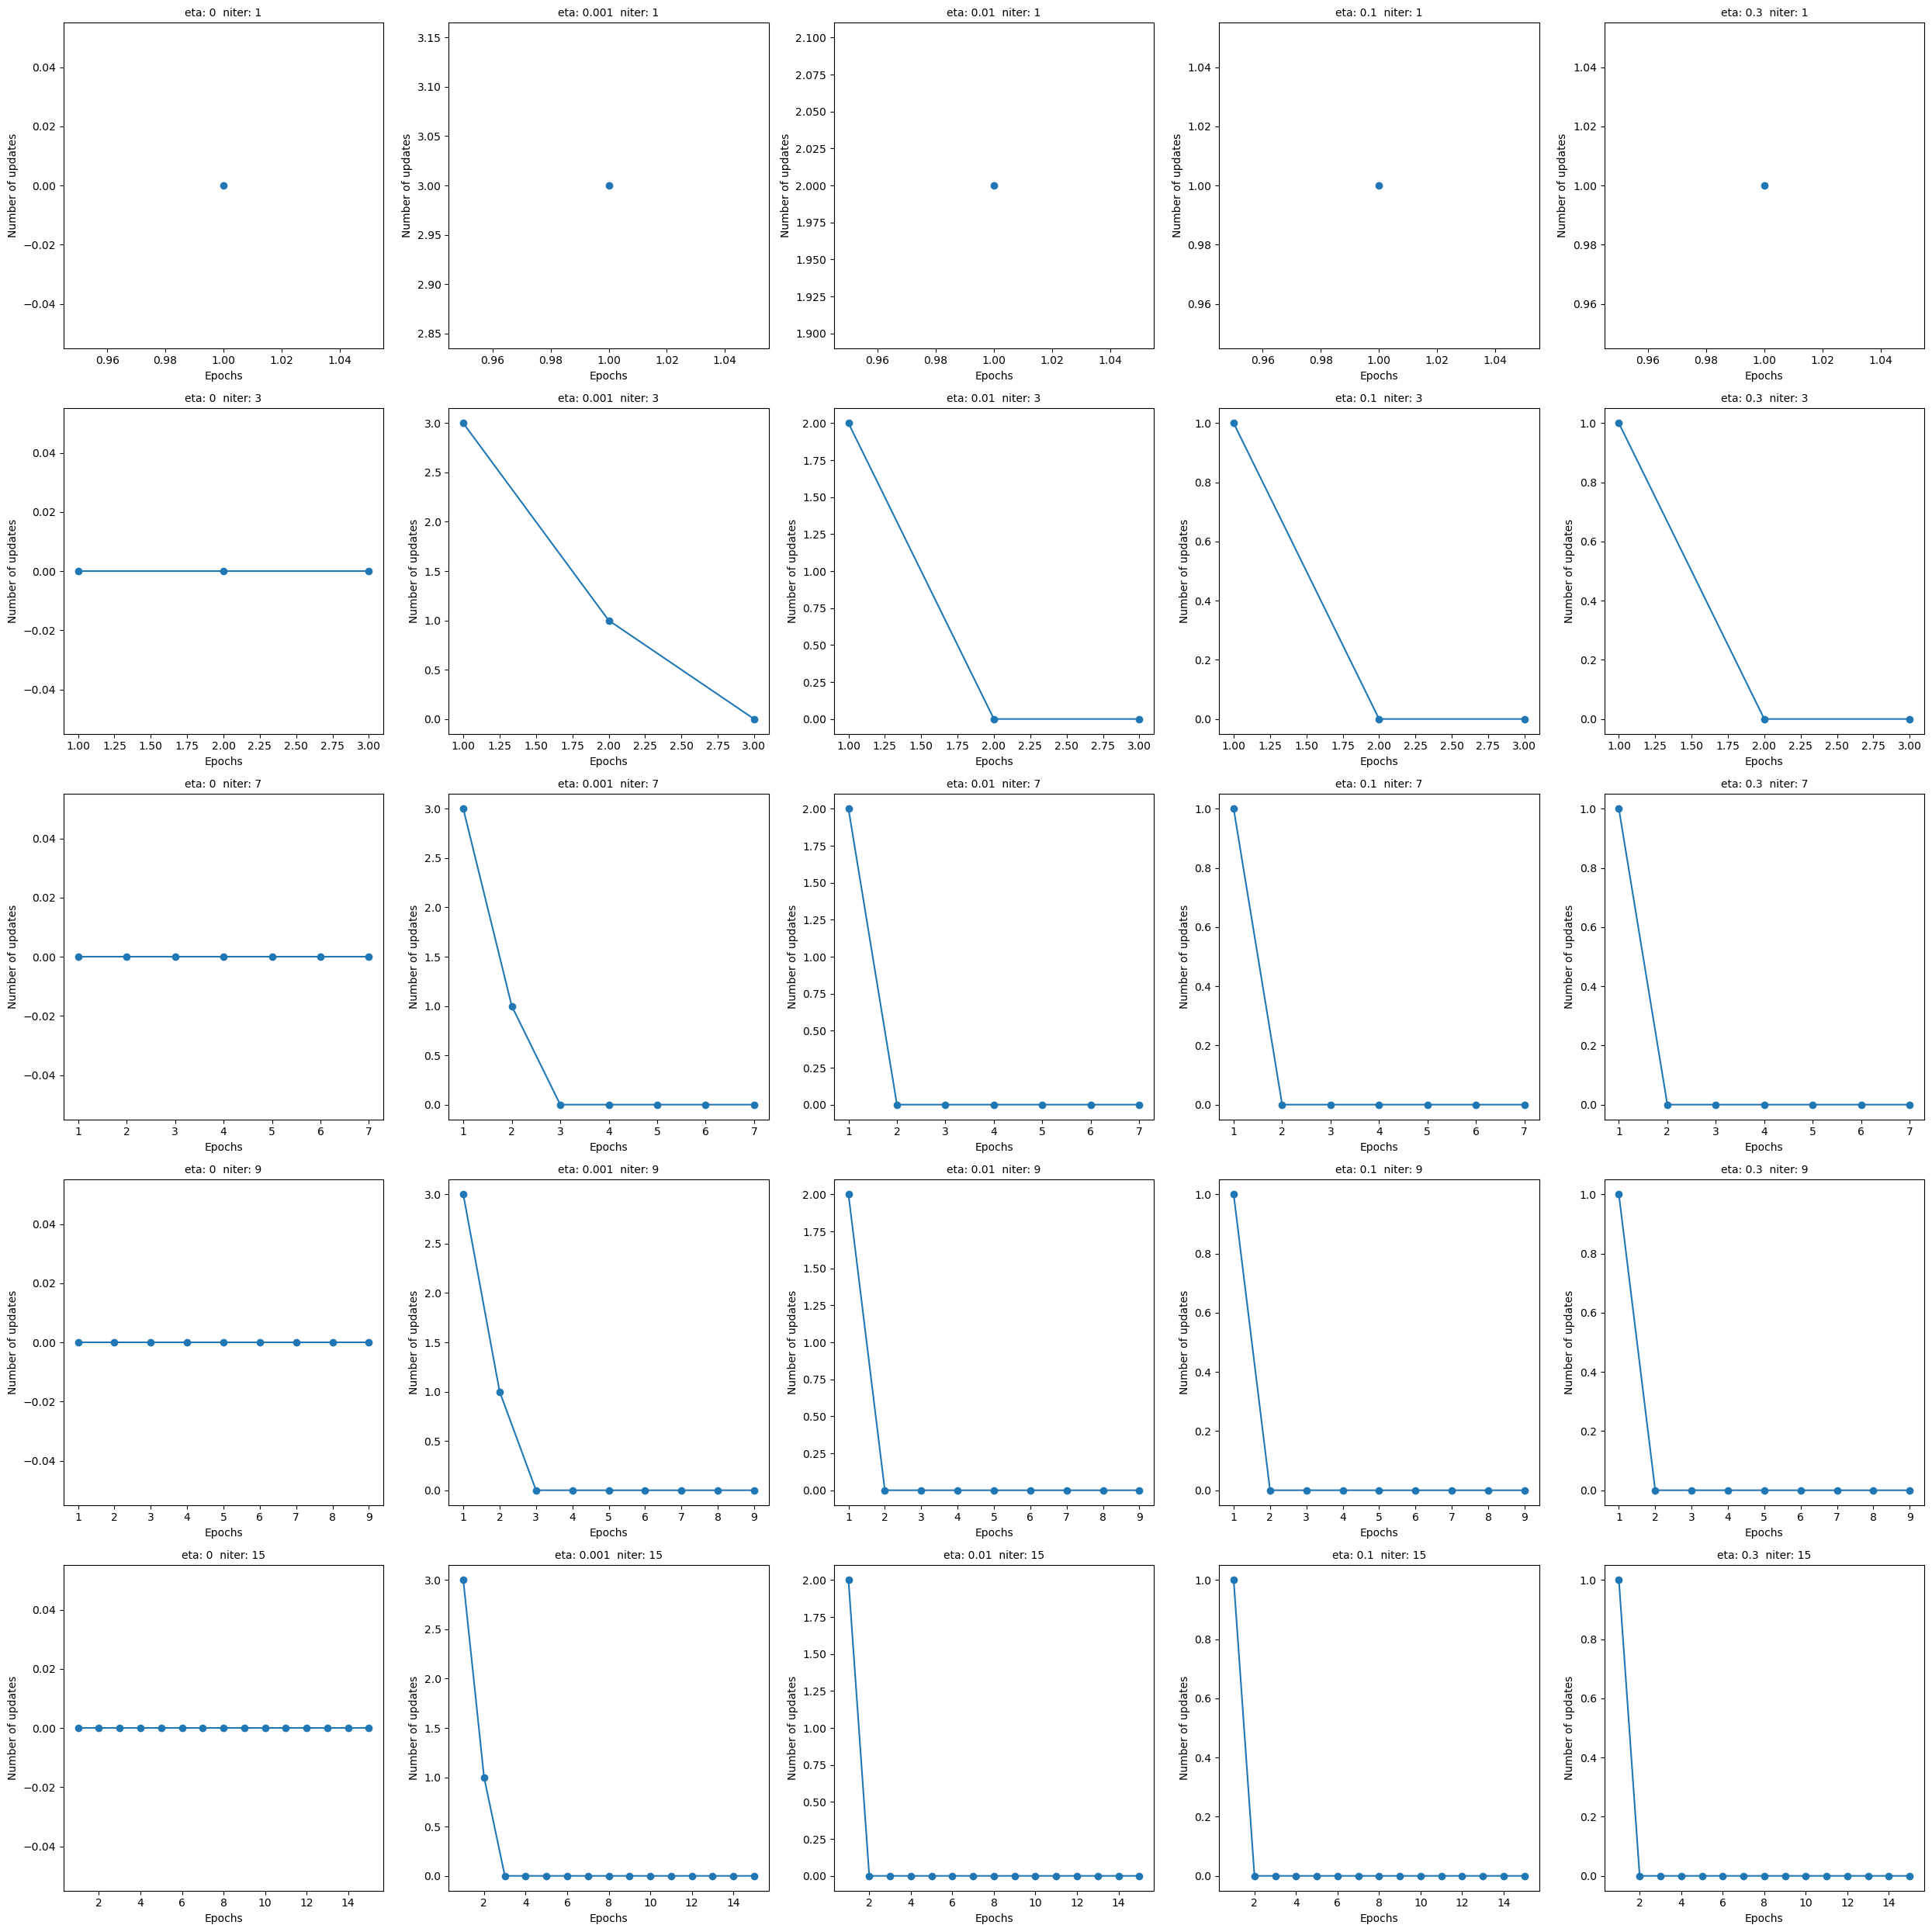

In [12]:
# Train Perceptron and find good value of eta and n_iter
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

list_eta = [0, 0.001, 0.01, 0.1, 0.3]
list_niter = [1,3,7,9,15]


for j, n_temp in enumerate(list_niter):

    for i, e_temp in enumerate(list_eta):
        ppn = Perceptron(n_iter=n_temp, eta= e_temp).fit(X, y)
        ax[j, i].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
        ax[j, i].set_xlabel('Epochs', fontsize=10)
        ax[j, i].set_ylabel('Number of updates', fontsize=10)
        ax[j, i].set_title(f"eta: {e_temp}  niter: {n_temp}", fontsize=10)
plt.tight_layout()
plt.show()

### Adaline algorithm

In [13]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.   
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

### Train Adaline model with AdalineSGD

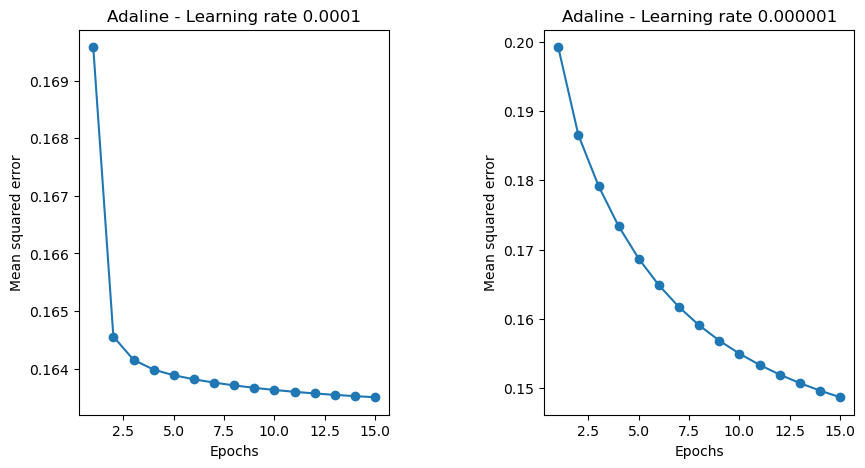

In [14]:
# Train adaptive linear neuron with AdalineSGD with 2 different learning rates.....without shuffling 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ada1 = AdalineSGD(n_iter=15, eta=0.0001, shuffle=False).fit(X_train.loc[:,['age', 'work_class', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']].values, y_train.loc[:,'income'].values)
ax[0].plot(range(1, len(ada1.losses_) + 1), ada1.losses_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Mean squared error')
ax[0].set_title('Adaline - Learning rate 0.0001')

ada2 = AdalineSGD(n_iter=15, eta=0.000001, shuffle=False).fit(X_train.loc[:,['age', 'work_class', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']].values, y_train.loc[:,'income'].values)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.000001')

# Adjust the horizontal space between subplots
plt.subplots_adjust(wspace=0.5)

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [15]:
# predict on trained AdalineSGD models with shuffle FALSE
y_pred =ada1.predict(X_test.loc[:,['age', 'work_class', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']].values)
print(f"Adaline accuracy with n_iter 15 and eta 0.0001: {accuracy_score(y_test.loc[:,'income'].values, y_pred):.4f}")

y_pred =ada2.predict(X_test.loc[:,['age', 'work_class', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']].values)
print(f"Adaline accuracy with n_iter 15 and eta 0.000001: {accuracy_score(y_test.loc[:,'income'].values, y_pred):.4f}")

Adaline accuracy with n_iter 15 and eta 0.0001: 0.8036
Adaline accuracy with n_iter 15 and eta 0.000001: 0.7858


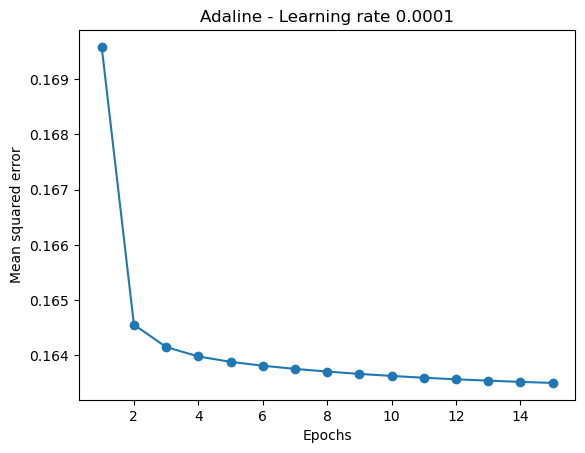

In [16]:
fig, ax = plt.subplots()
ada3 = AdalineSGD(n_iter=15, eta=0.0001, shuffle=True).fit(X_train.loc[:,['age', 'work_class', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']].values, y_train.loc[:,'income'].values)
ax.plot(range(1, len(ada1.losses_) + 1), ada1.losses_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean squared error')
ax.set_title('Adaline - Learning rate 0.0001')
plt.show()

In [17]:
# predict on trained AdalineSGD models with shuffle true
y_pred =ada3.predict(X_test.loc[:,['age', 'work_class', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']].values)
print(f"Adaline accuracy with n_iter 15 and eta 0.0001: {accuracy_score(y_test.loc[:,'income'].values, y_pred):.4f}")

Adaline accuracy with n_iter 15 and eta 0.0001: 0.7893


In [18]:
validation = preprocess_data(validation, False)

        0    1          2       3             4              5   \
0      NaN  age  workclass  fnlwgt     education  education-num   
1  14160.0   27    Private  160178  Some-college             10   
2  27048.0   45  State-gov   50567       HS-grad              9   
3  28868.0   29    Private  185908     Bachelors             13   
4   5667.0   30    Private  190040     Bachelors             13   

                   6                  7              8      9       10  \
0      marital-status         occupation   relationship   race     sex   
1            Divorced       Adm-clerical  Not-in-family  White  Female   
2  Married-civ-spouse    Exec-managerial           Wife  White  Female   
3  Married-civ-spouse    Exec-managerial        Husband  Black    Male   
4       Never-married  Machine-op-inspct  Not-in-family  White  Female   

             11            12              13              14  
0  capital-gain  capital-loss  hours-per-week  native-country  
1             0         

/var/folders/d1/pkkj1yg97vd_wwkpsfbyc2480000gn/T/ipykernel_8000/416825331.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/d1/pkkj1yg97vd_wwkpsfbyc2480000gn/T/ipykernel_8000/416825331.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/d1/pkkj1yg97vd_wwkpsfbyc2480000gn/T/ipykernel_8000/416825331.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [19]:
# Using the best AdalineSGD model to predict on the validation data
y_val_pred = ada3.predict(validation.loc[:,['age', 'work_class', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship','race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']].values)
print(y_val_pred)

[0 0 1 ... 1 0 0]


In [20]:
# Assumption:  This code assumes you have already clean, processed, and split a data set.
'''
Input Data Required:
X_train = cleaned, processed input data for training prediction models
y_train = response variable associated with X_train; truth values
X_test = cleaned, processed input data for testing prediction model created on training dataset
y_test = response variable associated with X_test; truth values

Note: Current order of rows ensure y_train = X_train and y_test = X_test, but if you sort and remove rows this association changes.
'''
# Scikit-learn Perceptron
sk_ppn = SklearnPerceptron(eta0=0.1, max_iter=15, random_state=42)
sk_ppn.fit(X_train, y_train)
sk_y_pred_ppn = sk_ppn.predict(X_test)
print(f"Scikit-learn Perceptron accuracy: {accuracy_score(y_test, sk_y_pred_ppn):.4f}")

# Scikit-learn Adaline (using SGDClassifier with 'log_loss' is closer, but 'perceptron' is available)
# For Adaline (which uses GD), SGDClassifier with 'hinge' loss is a good proxy, as it's a linear classifier with regularization
sk_ada = SGDClassifier(loss='perceptron', eta0=0.0001, learning_rate='constant', max_iter=15, random_state=42)
sk_ada.fit(X_train, y_train)
sk_y_pred_ada = sk_ada.predict(X_test)
print(f"Scikit-learn Adaline (SGDClassifier) accuracy: {accuracy_score(y_test, sk_y_pred_ada):.4f}")

Scikit-learn Perceptron accuracy: 0.8150
Scikit-learn Adaline (SGDClassifier) accuracy: 0.7871


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


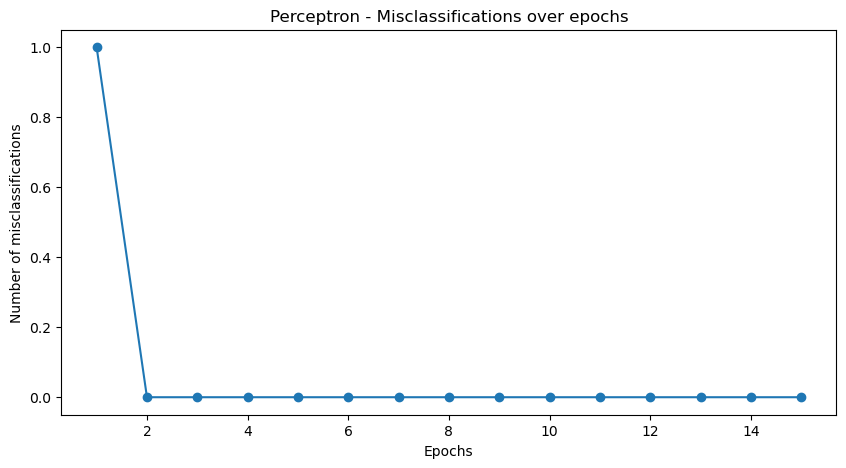

In [21]:
# Plot misclassifications for Perceptron over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron - Misclassifications over epochs')
plt.show()

In [22]:
# Find accuracy of Perceptron model
y_pred_ppn = ppn.predict(X_test.loc[:,['age', 'work_class', 'education', 'education_num',
                       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                        'capital_loss', 'hours_per_week', 'native_country']].values)
print(f"Perceptron accuracy: {accuracy_score(y_test.loc[:,'income'].values, y_pred_ppn):.4f}")

Perceptron accuracy: 0.7685


In [23]:
# Preprocess validation data and predict with best models
X_val_df = preprocess_data(validation, False)

# Remove id and fnlwgt columns if they exist
if 'id' in X_val_df.columns:
    X_val_df = X_val_df.drop(columns=['id'])
if 'fnlwgt' in X_val_df.columns:
    X_val_df = X_val_df.drop(columns=['fnlwgt'])

# One-hot encode categorical features for validation data
X_val_encoded = pd.get_dummies(X_val_df, drop_first=True)

# Get the original training data columns (before conversion to numpy array)
# We need to recreate the training data structure
X_train_df = pd.get_dummies(X_train, drop_first=True)  # One-hot encode training data

# Ensure validation data has the same columns as training data
missing_cols = set(X_train_df.columns) - set(X_val_encoded.columns)
# Add missing columns with default value 0
for col in missing_cols:
    X_val_encoded[col] = 0

# Ensure the order of columns is the same as in training data
X_val_encoded = X_val_encoded[X_train_df.columns]

# Convert to numpy array
X_val = X_val_encoded.astype(float).values

# Make predictions with best Perceptron model
val_pred_ppn = ppn.predict(X_val)

# Make predictions with best Adaline model (using ada1 with eta=0.0001)
val_pred_ada = ada1.predict(X_val)

        id       age  work_class  fnlwgt  education  education_num  \
1  14160.0 -0.851191           3  160178         15      -0.031693   
2  27048.0  0.469374           6   50567         11      -0.421896   
3  28868.0 -0.704461           3  185908          9       1.138915   
4   5667.0 -0.631097           3  190040          9       1.138915   
5   7827.0 -0.704461           5  189346         15      -0.031693   

   marital_status  occupation  relationship  race  sex  capital_gain  \
1               0           1             1     4    0     -0.147225   
2               2           4             5     4    0     -0.147225   
3               2           4             0     2    1     -0.147225   
4               4           7             1     4    0     -0.147225   
5               0           3             1     4    1      0.128973   

   capital_loss  hours_per_week  native_country  
1     -0.211274       -0.212164              37  
2     -0.211274       -0.051009              3

In [24]:
# Preprocess validation data
validation_processed = preprocess_data(validation, False)

# Remove id and fnlwgt columns from validation data
validation_processed = validation_processed.drop(columns=['fnlwgt', 'id'], axis=1)

# One-hot encode categorical features for validation data
validation_processed = pd.get_dummies(validation_processed, drop_first=True)
validation_processed = validation_processed.astype(float).values

# Make predictions with scikit-learn Perceptron
perceptron_pred = sk_ppn.predict(validation_processed)
perceptron_df = pd.DataFrame(perceptron_pred, columns=['predicted_income'])
perceptron_df.to_csv('Group_3_Perceptron_PredictedOutputs.csv', index=False)

# Make predictions with scikit-learn Adaline
adaline_pred = sk_ada.predict(validation_processed)
adaline_df = pd.DataFrame(adaline_pred, columns=['predicted_income'])
adaline_df.to_csv('Group_3_Adaline_PredictedOutputs.csv', index=False)

        id       age  work_class  fnlwgt  education  education_num  \
1  14160.0 -0.851191           3  160178         15      -0.031693   
2  27048.0  0.469374           6   50567         11      -0.421896   
3  28868.0 -0.704461           3  185908          9       1.138915   
4   5667.0 -0.631097           3  190040          9       1.138915   
5   7827.0 -0.704461           5  189346         15      -0.031693   

   marital_status  occupation  relationship  race  sex  capital_gain  \
1               0           1             1     4    0     -0.147225   
2               2           4             5     4    0     -0.147225   
3               2           4             0     2    1     -0.147225   
4               4           7             1     4    0     -0.147225   
5               0           3             1     4    1      0.128973   

   capital_loss  hours_per_week  native_country  
1     -0.211274       -0.212164              37  
2     -0.211274       -0.051009              3

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


## Part 3: Implement Logistic Regression and SVM using scikit-learn

In [25]:
# Train Logistic Regression and SVM models
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=1)
log_reg.fit(X_train, y_train)

# Support Vector Machine (linear kernel + RBF kernel for comparison)
svm_linear = SVC(kernel='linear', random_state=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=1)
svm_rbf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=1)

In [26]:
# Logistic Regression accuracy
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

# SVM accuracies
svm_linear_acc = accuracy_score(y_test, svm_linear.predict(X_test))
svm_rbf_acc = accuracy_score(y_test, svm_rbf.predict(X_test))

print(f"Logistic Regression Test Accuracy: {log_reg_acc:.4f}")
print(f"SVM (Linear) Test Accuracy: {svm_linear_acc:.4f}")
print(f"SVM (RBF) Test Accuracy: {svm_rbf_acc:.4f}")

# Pick best model for each
best_logreg = log_reg
best_svm = svm_linear if svm_linear_acc >= svm_rbf_acc else svm_rbf

Logistic Regression Test Accuracy: 0.8257
SVM (Linear) Test Accuracy: 0.8163
SVM (RBF) Test Accuracy: 0.8136


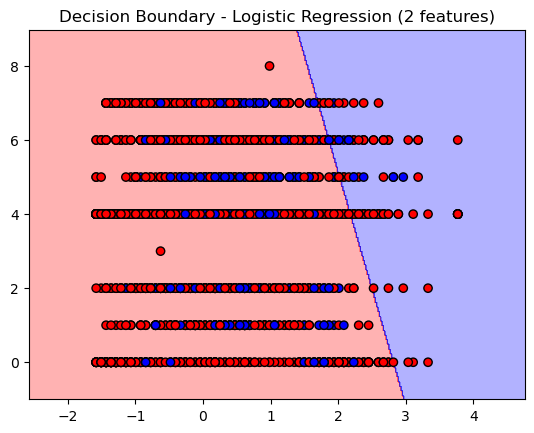

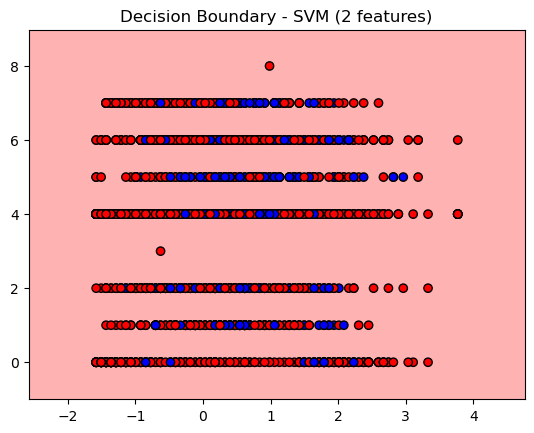

In [27]:
from matplotlib.colors import ListedColormap

# Select just 2 features for plotting (e.g., age and education_num = indices 0 and 1)
X_train_2feat = X_train.iloc[:, [0, 1]].values
X_test_2feat = X_test.iloc[:, [0, 1]].values
y_train_plot = y_train.values.ravel()
y_test_plot = y_test.values.ravel()

# Re-train models on just 2 features
log_reg_2feat = LogisticRegression(max_iter=1000)
log_reg_2feat.fit(X_train_2feat, y_train_plot)

svm_2feat = SVC(kernel="linear", C=1.0, random_state=42)
svm_2feat.fit(X_train_2feat, y_train_plot)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
    plt.title(title)
    plt.show()

# Plot for Logistic Regression
plot_decision_boundary(X_test_2feat, y_test_plot, log_reg_2feat, "Decision Boundary - Logistic Regression (2 features)")

# Plot for SVM
plot_decision_boundary(X_test_2feat, y_test_plot, svm_2feat, "Decision Boundary - SVM (2 features)")


In [28]:
# Predictions on validation set

# Validation predictions
val_pred_logreg = best_logreg.predict(X_val)
val_pred_svm = best_svm.predict(X_val)

print("Validation Predictions (Logistic Regression):", val_pred_logreg[:10])
print("Validation Predictions (SVM):", val_pred_svm[:10])

# Save predictions to CSV files
pd.DataFrame(val_pred_logreg).to_csv('Group_3_LogisticRegression_PredictedOutputs.csv', index=False, header=False)
pd.DataFrame(val_pred_svm).to_csv('Group_3_SVM_PredictedOutputs.csv', index=False, header=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Validation Predictions (Logistic Regression): [0 0 0 0 0 1 1 0 0 0]
Validation Predictions (SVM): [0 0 0 0 0 0 1 0 0 0]


## Model accuracy

In [29]:
# printing accuracy for all four models (Perceptron, Adaline, Logistic Regression, SVM)
print(f"Perceptron accuracy: {accuracy_score(y_test.loc[:, 'income'].values, y_pred_ppn):.4f}")
print(f"Scikit-learn Perceptron accuracy: {accuracy_score(y_test, sk_y_pred_ppn):.4f}")
print(f"Scikit-learn Adaline (SGDClassifier) accuracy: {accuracy_score(y_test, sk_y_pred_ada):.4f}")
print(f"Logistic Regression Test Accuracy: {log_reg_acc:.4f}")
print(f"SVM (Linear) Test Accuracy: {svm_linear_acc:.4f}")
print(f"SVM (RBF) Test Accuracy: {svm_rbf_acc:.4f}")

Perceptron accuracy: 0.7685
Scikit-learn Perceptron accuracy: 0.8150
Scikit-learn Adaline (SGDClassifier) accuracy: 0.7871
Logistic Regression Test Accuracy: 0.8257
SVM (Linear) Test Accuracy: 0.8163
SVM (RBF) Test Accuracy: 0.8136
